### 0.Do the imports

In [1]:
from PIL import Image
import numpy as np
import os
import glob
import re
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt    
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras

### 1. Load and split the data

In [2]:
#加载训练用数据
data = np.load(r"dataset.npy")

In [3]:
data.shape 

(2783, 2, 128, 128, 3)

Text(0.5, 1.0, 'error')

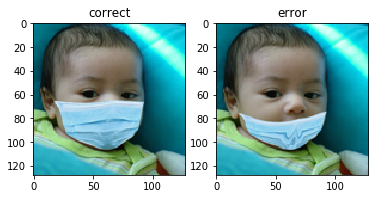

In [4]:
plt.subplot(121).imshow(data[0,0])
plt.title('correct')
plt.subplot(122).imshow(data[0,1])
plt.title('error')

In [5]:
#用字典储存标签
dict_label = {1:'correct',0:'error'}

In [6]:
def data_processing(data):
    
    #reshape数据
    data1 = data.reshape(len(data)*len(data[0]),128,128,3)
    
    #为数据打上标签，1为正确佩戴，0为错误佩戴
    y = np.array([1,0]*int(len(data1)/2)).reshape(-1,1)
    
    return data1,y

In [7]:
data1,y = data_processing(data)

In [8]:
data1.shape, y, y.shape

((5566, 128, 128, 3),
 array([[1],
        [0],
        [1],
        ...,
        [0],
        [1],
        [0]]),
 (5566, 1))

In [9]:
#分配训练测试dataset
X_train,X_test,y_train,y_test = train_test_split(data1,y,test_size=0.2,random_state=42)
X_train.shape,y_test.shape

((4452, 128, 128, 3), (1114, 1))

### 2. Implement the model

In [25]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (128,128,3)),
    keras.layers.Dense(128,activation =tf.nn.relu),
    keras.layers.Dense(2,activation = tf.nn.softmax)
])

In [26]:
model

### 3. Train the model

In [27]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,y_train,epochs=5)
test_loss,test_acc = model.evaluate(X_test,y_test)

print('test accuracy:',test_acc)

Train on 4452 samples
Epoch 1/5
4452/4452 [==============================] - 10s 2ms/sample - loss: 462.5809 - accuracy: 0.7779
Epoch 2/5
4452/4452 [==============================] - 10s 2ms/sample - loss: 7.5489 - accuracy: 0.9450
Epoch 3/5
4452/4452 [==============================] - 9s 2ms/sample - loss: 15.0369 - accuracy: 0.9268
Epoch 4/5
4452/4452 [==============================] - 9s 2ms/sample - loss: 16.6520 - accuracy: 0.9313
Epoch 5/5
1114/1114 [==============================] - 1s 779us/sample - loss: 12.3373 - accuracy: 0.9506
test accuracy: 0.95062834


### 4. Evaluate the model

In [35]:
#装载测试数组并处理
data_test = np.load(r"dataset_test.npy")

data_t,y_t = data_processing(data_test)

(1906, 128, 128, 3)


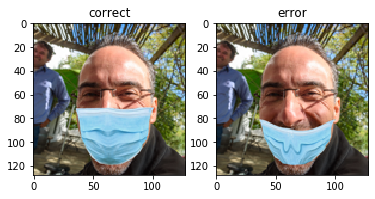

In [36]:
plt.subplot(121).imshow(data_t[0])
plt.title('correct')
plt.subplot(122).imshow(data_t[1])
plt.title('error')

print(data_t.shape)

In [37]:
#进行判断
def score (data,y):
    y_predict = []
    data_t = data.reshape(len(data),128*128*3)
    
    #获得预测标签数组
    for i in range(len(data)):
        data_tt = data_t[i].reshape(1,128*128*3)
        predictions = model.predict(data_tt)
        pred = np.argmax(predictions[0])
        y_predict.append(pred)
    
    #reshape预测值与真实值
    y_p = np.array(y_predict).reshape(1,len(np.array(y_predict)))
    y_t = y.reshape(1,len(y))
    
    #获得成绩
    score = (np.sum(y_p == y_t) / len(y_t[0]))
    
    return score

In [38]:
score(data_t,y_t)

ValueError: Error when checking input: expected flatten_1_input to have 4 dimensions, but got array with shape (1, 49152)

### 5. Predict one photo

In [32]:
def true_or_not(path):
    imag = Image.open(path)
    imag = imag.resize((128,128))
    
    plt.imshow(imag)
    
    Im = np.array(imag).reshape(1,128*128*3)
    
    predictions = model.predict(Im)
    pred = np.argmax(predictions[0])
    result = dict_label[np.argmax(predictions[0])]
    
    return result

ValueError: Error when checking input: expected flatten_1_input to have 4 dimensions, but got array with shape (1, 49152)

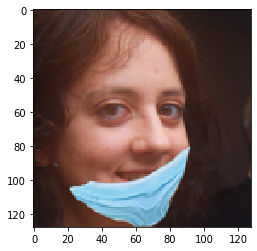

In [33]:
true_or_not(r"001.jpg")

ValueError: Error when checking input: expected flatten_1_input to have 4 dimensions, but got array with shape (1, 49152)

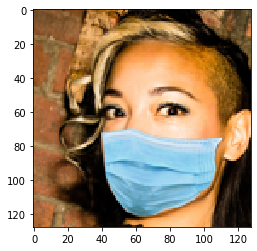

In [34]:
true_or_not(r"002.jpg")